In [1]:
# Import Libraries and Dependencies 

import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import urllib.request
import matplotlib.pyplot as plt
import os
import json
from pathlib import Path
from datetime import datetime, timedelta
from tiingo import TiingoClient
import seaborn as sb
%matplotlib inline
import pandas_montecarlo
#pip install --user --upgrade matplotlib
#pip install pandas_montecarlo

In [2]:
# grab data set from url *multipul updates each day make sure we are on current tab....

cv_data = pd.read_html('https://docs.google.com/spreadsheets/d/1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM/htmlview?usp=sharing&sle=true#')

In [3]:
#combine all tabs from data set
cv_data =pd.concat(cv_data)
cv_data

C:\Users\phale\Anaconda3\envs\vizenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,A,B,C,D,E,F,G,H,I,Unnamed: 0
0,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,NaN,NaN,NaN,1
1,Hubei,Mainland China,2/9/20 11:13,27100,780,1480,NaN,NaN,NaN,2
2,Guangdong,Mainland China,2/9/20 15:03,1131,1,141,NaN,NaN,NaN,3
3,Zhejiang,Mainland China,2/9/20 12:03,1075,0,201,NaN,NaN,NaN,4
4,Henan,Mainland China,2/9/20 11:23,1033,6,153,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...
23,Heilongjiang,China,1/21/2020,NaN,1,NaN,NaN,NaN,NaN,24
24,NaN,Japan,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,25
25,NaN,Thailand,1/21/2020,2,NaN,NaN,NaN,NaN,NaN,26
26,NaN,South Korea,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,27


In [4]:

#remove Strings from 1st row
cv_data.drop([0], inplace=True)
cv_data

,A,B,C,D,E,F,G,H,I,Unnamed: 0
1,Hubei,Mainland China,2/9/20 11:13,27100,780,1480,NaN,NaN,NaN,2
2,Guangdong,Mainland China,2/9/20 15:03,1131,1,141,NaN,NaN,NaN,3
3,Zhejiang,Mainland China,2/9/20 12:03,1075,0,201,NaN,NaN,NaN,4
4,Henan,Mainland China,2/9/20 11:23,1033,6,153,NaN,NaN,NaN,5
5,Hunan,Mainland China,2/9/20 12:33,838,1,186,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...
23,Heilongjiang,China,1/21/2020,NaN,1,NaN,NaN,NaN,NaN,24
24,NaN,Japan,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,25
25,NaN,Thailand,1/21/2020,2,NaN,NaN,NaN,NaN,NaN,26
26,NaN,South Korea,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,27


In [5]:
#drop "Unnamed:0"

#cv_data =cv_data.drop(columns=['Unnamed: 0','G','H','I'], inplace=True)

#cv_data

#rename columns in dataframe

cv_data = cv_data.rename(columns={
    'A':'Province/State',
    'B':'Country/Region',
    'C':'Last_Update',
    'D':'Infected',
    'E':'Deaths',
    'F':'Recovered',
    
})

In [6]:
cv_data.head()

,Province/State,Country/Region,Last_Update,Infected,Deaths,Recovered,G,H,I,Unnamed: 0
1,Hubei,Mainland China,2/9/20 11:13,27100,780,1480,NaN,NaN,NaN,2
2,Guangdong,Mainland China,2/9/20 15:03,1131,1,141,NaN,NaN,NaN,3
3,Zhejiang,Mainland China,2/9/20 12:03,1075,0,201,NaN,NaN,NaN,4
4,Henan,Mainland China,2/9/20 11:23,1033,6,153,NaN,NaN,NaN,5
5,Hunan,Mainland China,2/9/20 12:33,838,1,186,NaN,NaN,NaN,6


In [7]:
#set index

cv_data =cv_data.set_index('Last_Update')

cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered,G,H,I,Unnamed: 0
Last_Update,,,,,,,,,
2/9/20 11:13,Hubei,Mainland China,27100,780,1480,NaN,NaN,NaN,2
2/9/20 15:03,Guangdong,Mainland China,1131,1,141,NaN,NaN,NaN,3
2/9/20 12:03,Zhejiang,Mainland China,1075,0,201,NaN,NaN,NaN,4
2/9/20 11:23,Henan,Mainland China,1033,6,153,NaN,NaN,NaN,5
2/9/20 12:33,Hunan,Mainland China,838,1,186,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...
1/21/2020,Heilongjiang,China,NaN,1,NaN,NaN,NaN,NaN,24
1/21/2020,NaN,Japan,1,NaN,NaN,NaN,NaN,NaN,25
1/21/2020,NaN,Thailand,2,NaN,NaN,NaN,NaN,NaN,26


In [8]:
#drop "Unnamed:0"

cv_data =cv_data.drop(columns=['Unnamed: 0','G','H','I'], inplace=False)




In [9]:
cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/9/20 11:13,Hubei,Mainland China,27100,780,1480
2/9/20 15:03,Guangdong,Mainland China,1131,1,141
2/9/20 12:03,Zhejiang,Mainland China,1075,0,201
2/9/20 11:23,Henan,Mainland China,1033,6,153
2/9/20 12:33,Hunan,Mainland China,838,1,186
...,...,...,...,...,...
1/21/2020,Heilongjiang,China,NaN,1,NaN
1/21/2020,NaN,Japan,1,NaN,NaN
1/21/2020,NaN,Thailand,2,NaN,NaN


In [10]:
cv_data.isnull()

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/9/20 11:13,False,False,False,False,False
2/9/20 15:03,False,False,False,False,False
2/9/20 12:03,False,False,False,False,False
2/9/20 11:23,False,False,False,False,False
2/9/20 12:33,False,False,False,False,False
...,...,...,...,...,...
1/21/2020,False,False,True,False,True
1/21/2020,True,False,False,True,True
1/21/2020,True,False,False,True,True


In [11]:
cv_data.dropna(inplace=True)
cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/9/20 11:13,Hubei,Mainland China,27100,780,1480
2/9/20 15:03,Guangdong,Mainland China,1131,1,141
2/9/20 12:03,Zhejiang,Mainland China,1075,0,201
2/9/20 11:23,Henan,Mainland China,1033,6,153
2/9/20 12:33,Hunan,Mainland China,838,1,186
...,...,...,...,...,...
1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1
1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1
1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1


In [12]:
cv_data.isnull().sum()
cv_data.head()

#cv_data['ratio']= cv_data['Deaths']/ cv_data['Confirmed']

cv_data.dtypes

Province/State    object
Country/Region    object
Infected          object
Deaths            object
Recovered         object
dtype: object

In [13]:
# change types from object to int.
#people_df['Person_ID'] = people_df['Person_ID'].astype('int')

cv_data['Infected'] = cv_data['Infected'].astype('int')
cv_data['Deaths'] = cv_data['Deaths'].astype('int')
cv_data['Recovered'] = cv_data['Recovered'].astype('int')

cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/9/20 11:13,Hubei,Mainland China,27100,780,1480
2/9/20 15:03,Guangdong,Mainland China,1131,1,141
2/9/20 12:03,Zhejiang,Mainland China,1075,0,201
2/9/20 11:23,Henan,Mainland China,1033,6,153
2/9/20 12:33,Hunan,Mainland China,838,1,186
...,...,...,...,...,...
1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1
1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1
1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1


In [14]:
cv_data[['Province/State']].duplicated()

Last_Update
2/9/20 11:13          False
2/9/20 15:03          False
2/9/20 12:03          False
2/9/20 11:23          False
2/9/20 12:33          False
                      ...  
1/25/2020 12:00 PM     True
1/25/2020 12:00 PM     True
1/25/2020 12:00 AM     True
1/24/2020 12:00 PM     True
1/23/20 12:00 PM       True
Length: 900, dtype: bool

In [15]:
#create a for loop to clean up duplicates for each day and get a running total for that days end.
#just use cumprod feature?
cv_data_days= cv_data.drop_duplicates(subset=['Province/State'], inplace=False)

In [16]:
cv_data_days

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/9/20 11:13,Hubei,Mainland China,27100,780,1480
2/9/20 15:03,Guangdong,Mainland China,1131,1,141
2/9/20 12:03,Zhejiang,Mainland China,1075,0,201
2/9/20 11:23,Henan,Mainland China,1033,6,153
2/9/20 12:33,Hunan,Mainland China,838,1,186
2/9/20 9:33,Anhui,Mainland China,779,1,72
2/9/20 11:33,Jiangxi,Mainland China,740,0,73
2/9/20 10:23,Jiangsu,Mainland China,468,0,71
2/9/20 12:13,Chongqing,Mainland China,450,2,50


In [17]:
cv_data_days['Deaths'].sum()

813

In [18]:
cv_data_days['Infected'].sum()

37451

In [19]:
cv_data_days['Recovered'].sum()

2903

In [20]:
#add totals of columns together for their individual daily total to be added to df daily
# replace index with date use current 

cv_data_2= cv_data.reset_index()

In [21]:
cv_data_2


,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered
0,2/9/20 11:13,Hubei,Mainland China,27100,780,1480
1,2/9/20 15:03,Guangdong,Mainland China,1131,1,141
2,2/9/20 12:03,Zhejiang,Mainland China,1075,0,201
3,2/9/20 11:23,Henan,Mainland China,1033,6,153
4,2/9/20 12:33,Hunan,Mainland China,838,1,186
...,...,...,...,...,...,...
895,1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1
896,1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1
897,1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1
898,1/24/2020 12:00 PM,Shanghai,Mainland China,20,22,1


In [22]:

#add new date column to get rid of time stamp
cv_data_2['Last_Update']= pd.to_datetime(cv_data_2.Last_Update)
cv_data_2['Date']= cv_data_2['Last_Update'].dt.strftime('%m/%d/%Y')
print (cv_data_2)


            Last_Update Province/State  Country/Region  Infected  Deaths  \
0   2020-02-09 11:13:00          Hubei  Mainland China     27100     780   
1   2020-02-09 15:03:00      Guangdong  Mainland China      1131       1   
2   2020-02-09 12:03:00       Zhejiang  Mainland China      1075       0   
3   2020-02-09 11:23:00          Henan  Mainland China      1033       6   
4   2020-02-09 12:33:00          Hunan  Mainland China       838       1   
..                  ...            ...             ...       ...     ...   
895 2020-01-25 12:00:00       Shanghai  Mainland China        40      72   
896 2020-01-25 12:00:00       Shanghai  Mainland China        33      72   
897 2020-01-25 00:00:00       Shanghai  Mainland China        33      22   
898 2020-01-24 12:00:00       Shanghai  Mainland China        20      22   
899 2020-01-23 12:00:00      Guangdong  Mainland China        32       1   

     Recovered        Date  
0         1480  02/09/2020  
1          141  02/09/2020  


In [23]:
# Set index as 'Date'
cv_data_2.set_index('Date')

,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered
Date,,,,,,
02/09/2020,2020-02-09 11:13:00,Hubei,Mainland China,27100,780,1480
02/09/2020,2020-02-09 15:03:00,Guangdong,Mainland China,1131,1,141
02/09/2020,2020-02-09 12:03:00,Zhejiang,Mainland China,1075,0,201
02/09/2020,2020-02-09 11:23:00,Henan,Mainland China,1033,6,153
02/09/2020,2020-02-09 12:33:00,Hunan,Mainland China,838,1,186
...,...,...,...,...,...,...
01/25/2020,2020-01-25 12:00:00,Shanghai,Mainland China,40,72,1
01/25/2020,2020-01-25 12:00:00,Shanghai,Mainland China,33,72,1
01/25/2020,2020-01-25 00:00:00,Shanghai,Mainland China,33,22,1


In [24]:
cv_data_2.drop(columns=['Last_Update'])

,Province/State,Country/Region,Infected,Deaths,Recovered,Date
0,Hubei,Mainland China,27100,780,1480,02/09/2020
1,Guangdong,Mainland China,1131,1,141,02/09/2020
2,Zhejiang,Mainland China,1075,0,201,02/09/2020
3,Henan,Mainland China,1033,6,153,02/09/2020
4,Hunan,Mainland China,838,1,186,02/09/2020
...,...,...,...,...,...,...
895,Shanghai,Mainland China,40,72,1,01/25/2020
896,Shanghai,Mainland China,33,72,1,01/25/2020
897,Shanghai,Mainland China,33,22,1,01/25/2020
898,Shanghai,Mainland China,20,22,1,01/24/2020


In [25]:
#drop duplicates in order to get the last value for the day
cv_data_2.drop_duplicates(subset=['Province/State', "Date"], inplace=True)
cv_data_2

,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered,Date
0,2020-02-09 11:13:00,Hubei,Mainland China,27100,780,1480,02/09/2020
1,2020-02-09 15:03:00,Guangdong,Mainland China,1131,1,141,02/09/2020
2,2020-02-09 12:03:00,Zhejiang,Mainland China,1075,0,201,02/09/2020
3,2020-02-09 11:23:00,Henan,Mainland China,1033,6,153,02/09/2020
4,2020-02-09 12:33:00,Hunan,Mainland China,838,1,186,02/09/2020
...,...,...,...,...,...,...,...
891,2020-01-26 23:00:00,Hubei,Mainland China,1423,76,44,01/26/2020
892,2020-01-26 23:00:00,Shanghai,Mainland China,53,1,1,01/26/2020
895,2020-01-25 12:00:00,Shanghai,Mainland China,40,72,1,01/25/2020
898,2020-01-24 12:00:00,Shanghai,Mainland China,20,22,1,01/24/2020


In [26]:
#create new data frame extracting only mainland China info
cv_data_china=cv_data_2.loc[cv_data_2['Country/Region']=='Mainland China']
cv_data_china

,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered,Date
0,2020-02-09 11:13:00,Hubei,Mainland China,27100,780,1480,02/09/2020
1,2020-02-09 15:03:00,Guangdong,Mainland China,1131,1,141,02/09/2020
2,2020-02-09 12:03:00,Zhejiang,Mainland China,1075,0,201,02/09/2020
3,2020-02-09 11:23:00,Henan,Mainland China,1033,6,153,02/09/2020
4,2020-02-09 12:33:00,Hunan,Mainland China,838,1,186,02/09/2020
...,...,...,...,...,...,...,...
891,2020-01-26 23:00:00,Hubei,Mainland China,1423,76,44,01/26/2020
892,2020-01-26 23:00:00,Shanghai,Mainland China,53,1,1,01/26/2020
895,2020-01-25 12:00:00,Shanghai,Mainland China,40,72,1,01/25/2020
898,2020-01-24 12:00:00,Shanghai,Mainland China,20,22,1,01/24/2020


In [27]:
#Group by 'Date' in order to sum all
all_sum_cv = cv_data_china.groupby('Date').sum()

In [28]:
all_sum_cv.reset_index(inplace=True)

In [29]:
all_sum_cv.Date = pd.to_datetime(all_sum_cv.Date)

In [30]:
all_sum_cv.set_index('Date',inplace=True) 

In [31]:
#Find ratio of deaths to confirmed effected
#round decimals .000 
all_sum_cv['death_ratio']= all_sum_cv['Deaths']/ all_sum_cv['Infected']
all_sum_cv['recovered_ratio'] =all_sum_cv['Recovered']/ all_sum_cv['Infected']
#decimals =pd.Series ([3,3], index=['death_ratio', 'recovered_ratio'])
#cv_data.round(decimals)

In [83]:
all_sum_cv['recovered/death'] =all_sum_cv['Recovered']/all_sum_cv['Deaths']
all_sum_cv.head()

,Infected,Deaths,Recovered,death_ratio,recovered_ratio,recovered/death
Date,,,,,,
2020-01-23 00:00:00+00:00,32,1,2,0.031250,0.062500,2.000000
2020-01-24 00:00:00+00:00,20,22,1,1.100000,0.050000,0.045455
2020-01-25 00:00:00+00:00,40,72,1,1.800000,0.025000,0.013889
2020-01-26 00:00:00+00:00,1476,77,45,0.052168,0.030488,0.584416
2020-01-27 00:00:00+00:00,2860,102,52,0.035664,0.018182,0.509804


C:\Users\phale\Anaconda3\envs\vizenv\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


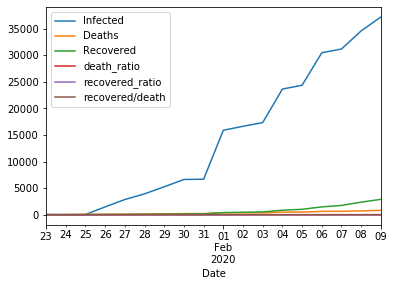

In [84]:
all_sum_cv.plot()

In [85]:
##Monte Carlo Simulation on Corona Virus

In [86]:
#jjp - fixed name
infection_change = all_sum_cv.pct_change()

In [137]:
infection_change.head()

,Infected,Deaths,Recovered,death_ratio,recovered_ratio,recovered/death
Date,,,,,,
2020-01-23 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24 00:00:00+00:00,-0.375000,21.000000,-0.500000,34.200000,-0.200000,-0.977273
2020-01-25 00:00:00+00:00,1.000000,2.272727,0.000000,0.636364,-0.500000,-0.694444
2020-01-26 00:00:00+00:00,35.900000,0.069444,44.000000,-0.971018,0.219512,41.077922
2020-01-27 00:00:00+00:00,0.937669,0.324675,0.155556,-0.316356,-0.403636,-0.127669


In [95]:
# below is Stock Data

In [96]:
# Bring Env Variables into Python/Store in Variable
tiingo = os.getenv('TIINGO_API_KEY')

In [97]:
# Create a Client to Connect to Tiingo
client = TiingoClient()

In [98]:
# Create Start and End Dates for 1 Year's Worth of Historical Data
end = datetime.now()
start = end + timedelta(-30)

In [163]:
# Create DataFrames for China
china_ticker_df = client.get_dataframe(['ASHR','CQQQ', 'CHIE', 'CHIM', 'KURE', 'CHIS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')

C:\Users\phale\Anaconda3\envs\vizenv\lib\site-packages\tiingo\api.py:270: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  prices = pd.concat([prices, df[stock]], axis=1)


In [100]:
china_df = china_ticker_df.rename(columns={'ASHR':'ASHR (China SH Composite)','CQQQ':'CQQQ (China Technology)', 'CHIE':'CHIE (China Energy)', 'CHIM':'CHIM (China Materials)', 'KURE':'KURE (China Healthcare)', 'CHIS':'CHIS (China Consumer Staples)'})
china_df.head()

,ASHR (China SH Composite),CQQQ (China Technology),CHIE (China Energy),CHIM (China Materials),KURE (China Healthcare),CHIS (China Consumer Staples)
date,,,,,,
2020-01-10 00:00:00+00:00,30.27,57.04,11.010,17.065,23.8330,22.40
2020-01-13 00:00:00+00:00,30.88,58.93,11.015,17.260,24.4151,22.75
2020-01-14 00:00:00+00:00,30.64,57.74,10.905,17.430,24.1469,22.58
2020-01-15 00:00:00+00:00,30.41,57.94,10.925,17.285,24.1896,22.62
2020-01-16 00:00:00+00:00,30.44,58.23,10.840,17.190,24.5824,22.70


In [101]:
# Count/Drop Nulls (if any)
china_df.isnull().sum()

ASHR (China SH Composite)        0
CQQQ (China Technology)          0
CHIE (China Energy)              0
CHIM (China Materials)           0
KURE (China Healthcare)          0
CHIS (China Consumer Staples)    0
dtype: int64

In [102]:
china_df.dropna(inplace=True)
china_df.isnull().sum()

ASHR (China SH Composite)        0
CQQQ (China Technology)          0
CHIE (China Energy)              0
CHIM (China Materials)           0
KURE (China Healthcare)          0
CHIS (China Consumer Staples)    0
dtype: int64

In [103]:
china_daily_returns = china_df.pct_change()
china_daily_returns.head()

,ASHR (China SH Composite),CQQQ (China Technology),CHIE (China Energy),CHIM (China Materials),KURE (China Healthcare),CHIS (China Consumer Staples)
date,,,,,,
2020-01-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-13 00:00:00+00:00,0.020152,0.033135,0.000454,0.011427,0.024424,0.015625
2020-01-14 00:00:00+00:00,-0.007772,-0.020193,-0.009986,0.009849,-0.010985,-0.007473
2020-01-15 00:00:00+00:00,-0.007507,0.003464,0.001834,-0.008319,0.001768,0.001771
2020-01-16 00:00:00+00:00,0.000987,0.005005,-0.007780,-0.005496,0.016238,0.003537


In [104]:
us_ticker_df = client.get_dataframe(['SPY','IGM', 'IYE', 'IYM', 'IYH', 'IECS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')

In [105]:
us_df = us_ticker_df.rename(columns={'SPY':'SPY (USA SP500 Composite)', 'IGM':'IGM (USA Technology)', 'IYE':'IYE (USA Energy)', 'IYM':'IYM (USA Materials)', 'IYH':'IYH (USA Healthcare)', 'IECS':'IECS (USA Consumer Staples)'})

us_df.head()

,SPY (USA SP500 Composite),IGM (USA Technology),IYE (USA Energy),IYM (USA Materials),IYH (USA Healthcare),IECS (USA Consumer Staples)
date,,,,,,
2020-01-10 00:00:00+00:00,325.71,250.35,31.90,94.51,217.80,28.586
2020-01-13 00:00:00+00:00,327.95,253.39,31.92,95.85,216.87,28.803
2020-01-14 00:00:00+00:00,327.45,251.90,31.94,95.86,218.16,28.788
2020-01-15 00:00:00+00:00,328.19,252.33,31.75,96.25,220.01,29.007
2020-01-16 00:00:00+00:00,330.92,255.19,31.76,96.62,221.23,29.160


In [106]:
us_daily_returns = us_df.pct_change()
us_daily_returns.head()

,SPY (USA SP500 Composite),IGM (USA Technology),IYE (USA Energy),IYM (USA Materials),IYH (USA Healthcare),IECS (USA Consumer Staples)
date,,,,,,
2020-01-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-13 00:00:00+00:00,0.006877,0.012143,0.000627,0.014178,-0.004270,0.007591
2020-01-14 00:00:00+00:00,-0.001525,-0.005880,0.000627,0.000104,0.005948,-0.000521
2020-01-15 00:00:00+00:00,0.002260,0.001707,-0.005949,0.004068,0.008480,0.007607
2020-01-16 00:00:00+00:00,0.008318,0.011334,0.000315,0.003844,0.005545,0.005275


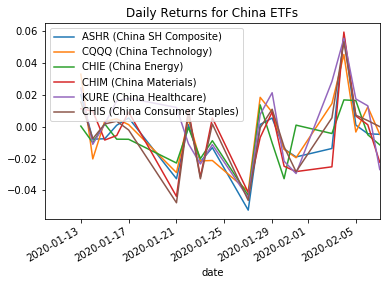

In [107]:
china_daily_returns.plot(title="Daily Returns for China ETFs")

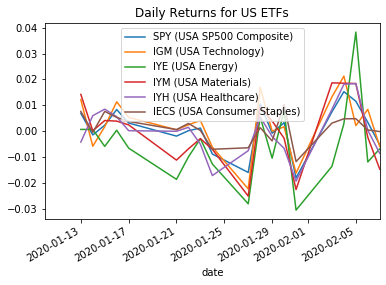

In [108]:
us_daily_returns.plot(title="Daily Returns for US ETFs")

In [109]:
china_std = china_daily_returns.std()
china_std

ASHR (China SH Composite)        0.021985
CQQQ (China Technology)          0.021602
CHIE (China Energy)              0.015338
CHIM (China Materials)           0.024464
KURE (China Healthcare)          0.024868
CHIS (China Consumer Staples)    0.023235
dtype: float64

In [110]:
us_std = us_daily_returns.std()
us_std

SPY (USA SP500 Composite)      0.008706
IGM (USA Technology)           0.010787
IYE (USA Energy)               0.014782
IYM (USA Materials)            0.012864
IYH (USA Healthcare)           0.010018
IECS (USA Consumer Staples)    0.005515
dtype: float64

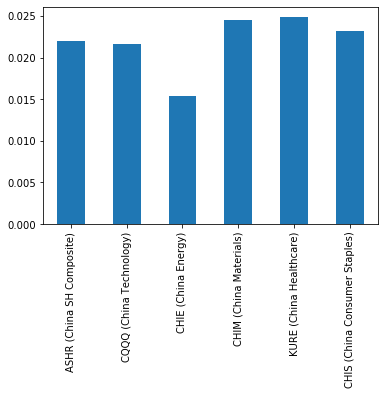

In [111]:
china_std.plot.bar()

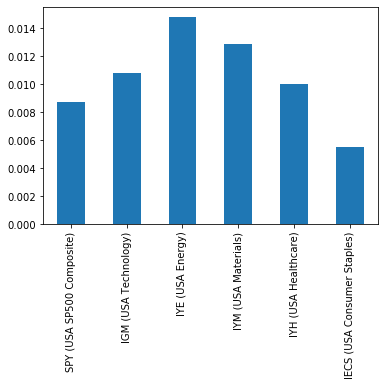

In [112]:
us_std.plot.bar()

In [113]:
#only need to run this once to normalize the 
all_sum_cv.index = all_sum_cv.index.tz_localize('UTC')

TypeError: Already tz-aware, use tz_convert to convert.

In [114]:
## Correlation Studies

In [115]:
china_cv_raw_df = pd.concat([china_df, all_sum_cv], axis=1, sort=True)
china_cv_raw_df.dropna(inplace=True)

In [116]:
usa_cv_raw_df = pd.concat([us_df, all_sum_cv], axis=1, sort=True)
usa_cv_raw_df.dropna(inplace=True)

In [117]:
usa_china_raw_df = pd.concat([us_df, china_df], axis=1, sort=True)
usa_china_raw_df.dropna(inplace=True)

In [118]:
all_data_raw_df = pd.concat([us_df, china_df, all_sum_cv], axis=1, sort=True)
all_data_raw_df.dropna(inplace=True)
#may need to take out duplicates

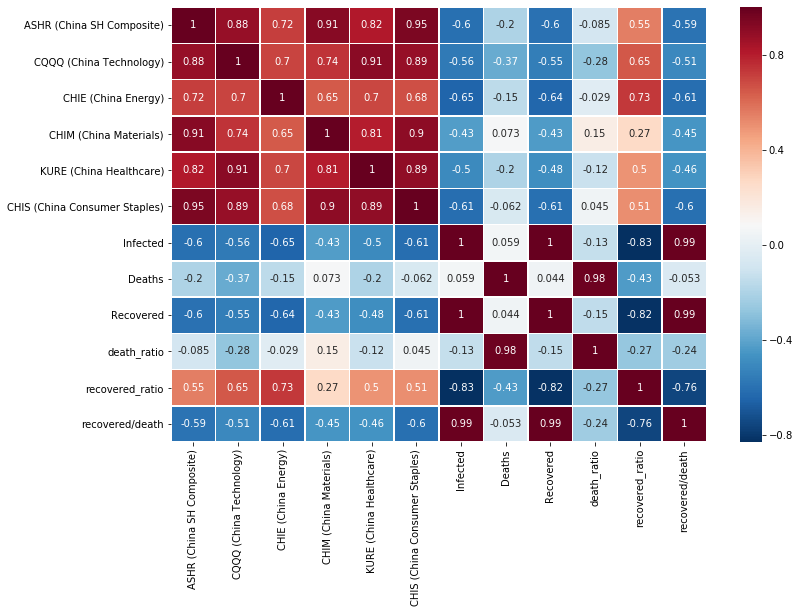

In [135]:
# China and the Coronavirus Correlations
#help from: https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04
#help from https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger
china_correl = china_cv_raw_df.pct_change().corr(method='pearson')

fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
sb.heatmap(china_correl, 
            xticklabels=china_correl.columns,
            yticklabels=china_correl.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

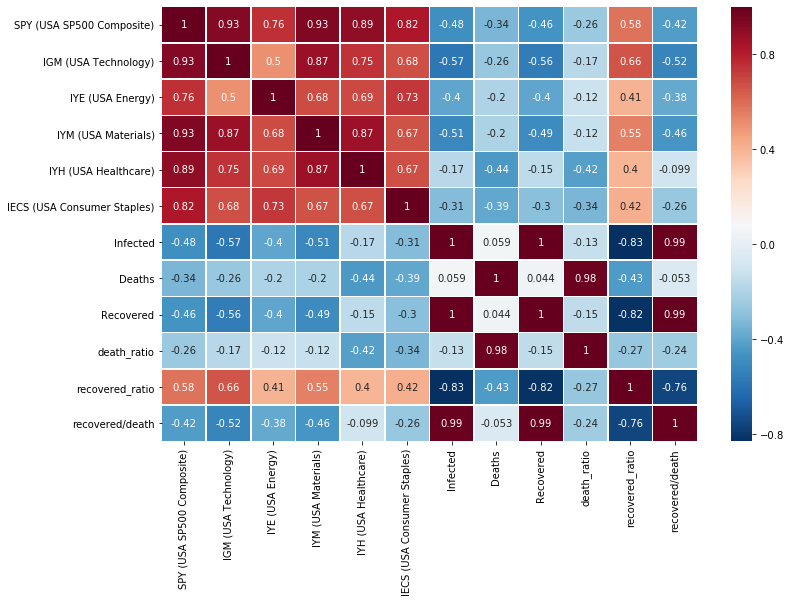

In [136]:
# USA and the Coronavirus Correlations
#help from: https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04
#help from https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger
usa_correl = usa_cv_raw_df.pct_change().corr(method='pearson')

fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
sb.heatmap(usa_correl, 
            xticklabels=usa_correl.columns,
            yticklabels=usa_correl.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

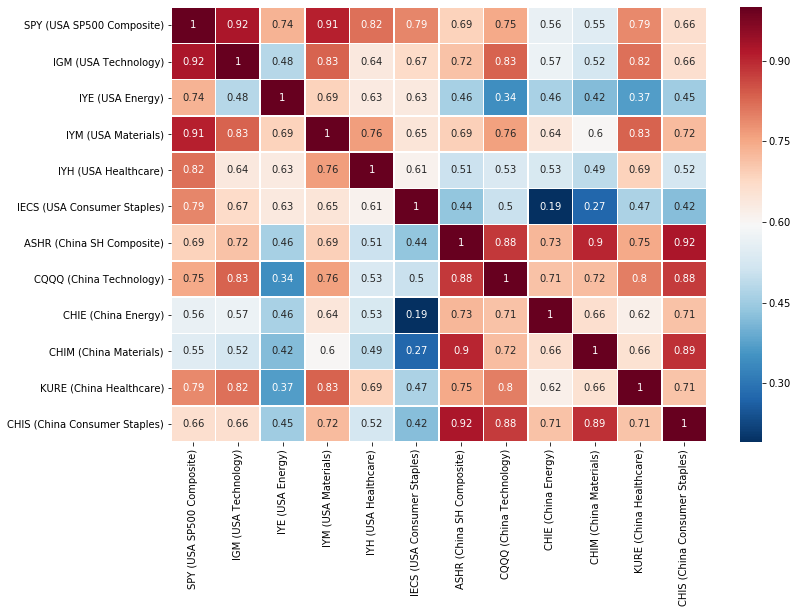

In [164]:
# China and the USA Correlations
#help from: https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04
#help from https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger
usa_china_correl = usa_china_raw_df.pct_change().corr(method='pearson')
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
sb.heatmap(usa_china_correl, 
            xticklabels=usa_china_correl.columns,
            yticklabels=usa_china_correl.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [122]:
mc_corona = all_sum_cv['Infected'].montecarlo(sims=100, bust=-0.1, goal=1)

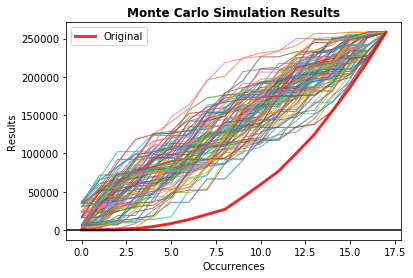

In [123]:
mc_corona.plot()

In [206]:
df_mc_corona =  mc_corona.data

In [207]:
df_all_data_pct_chg = all_data_raw_df.pct_change()*100

C:\Users\phale\Anaconda3\envs\vizenv\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\phale\Anaconda3\envs\vizenv\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2., 0., 1., 1., 0., 1., 2., 1., 2., 1.]),
 array([-1.8157959 , -1.48180362, -1.14781135, -0.81381907, -0.47982679,
        -0.14583452,  0.18815776,  0.52215004,  0.85614231,  1.19013459,
         1.52412687]),
 <a list of 10 Patch objects>)

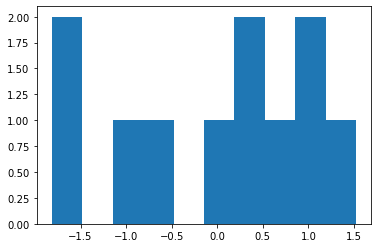

In [208]:
plt.hist(df_all_data_pct_chg['SPY (USA SP500 Composite)'])

(array([1., 0., 0., 4., 4., 1., 0., 0., 0., 1.]),
 array([-5.24109015, -4.13754905, -3.03400796, -1.93046686, -0.82692577,
         0.27661533,  1.38015642,  2.48369751,  3.58723861,  4.6907797 ,
         5.7943208 ]),
 <a list of 10 Patch objects>)

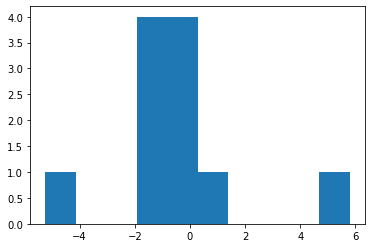

In [209]:
plt.hist(df_all_data_pct_chg['ASHR (China SH Composite)'])

(array([1., 0., 0., 0., 1., 1., 0., 1., 2., 5.]),
 array([-63.63636364, -54.70127186, -45.76618008, -36.83108831,
        -27.89599653, -18.96090476, -10.02581298,  -1.0907212 ,
          7.84437057,  16.77946235,  25.71455412]),
 <a list of 10 Patch objects>)

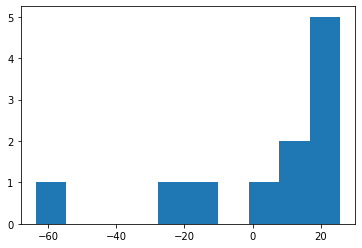

In [210]:
plt.hist(df_all_data_pct_chg['recovered_ratio'])

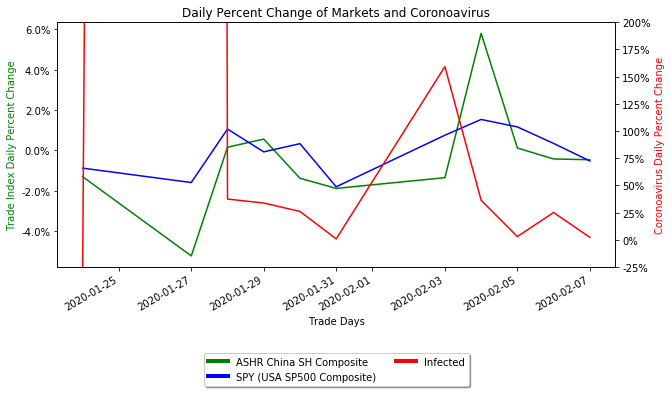

In [214]:
#created a double y axis chart to show percentage changes of market versus coronovirus
#looked for help on: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib/14762601
import matplotlib.ticker as mtick

x = df_all_data_pct_chg.index
y1 = df_all_data_pct_chg['ASHR (China SH Composite)']
y2 = df_all_data_pct_chg['SPY (USA SP500 Composite)']
y3 = df_all_data_pct_chg['Infected']

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', y2, 'b-')
ax2.plot(x, y3, 'r-')
                   
ax1.set_title('Daily Percent Change of Markets and Coronoavirus')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Trade Index Daily Percent Change', color='g')
ax2.set_ylabel('Coronoavirus Daily Percent Change', color='r')

ax2.set_ylim(-25, 175)

fig.autofmt_xdate()

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['ASHR China SH Composite', 'SPY (USA SP500 Composite)', 'Infected'], loc='upper center', bbox_to_anchor=(0.5, -.33),shadow=True, ncol=2)

plt.show()

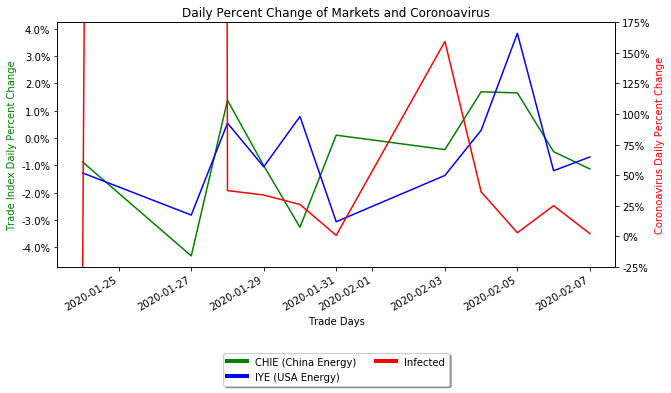

In [215]:
#created a double y axis chart to show percentage changes of market versus coronovirus
#looked for help on: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib/14762601
import matplotlib.ticker as mtick

x = df_all_data_pct_chg.index
y1 = df_all_data_pct_chg['CHIE (China Energy)']
y2 = df_all_data_pct_chg['IYE (USA Energy)']
y3 = df_all_data_pct_chg['Infected']

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', y2, 'b-')
ax2.plot(x, y3, 'r-')
                   
ax1.set_title('Daily Percent Change of Markets and Coronoavirus')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Trade Index Daily Percent Change', color='g')
ax2.set_ylabel('Coronoavirus Daily Percent Change', color='r')

ax2.set_ylim(-25, 175)

fig.autofmt_xdate()

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['CHIE (China Energy)', 'IYE (USA Energy)', 'Infected'], loc='upper center', bbox_to_anchor=(0.5, -.33),shadow=True, ncol=2)

plt.show()

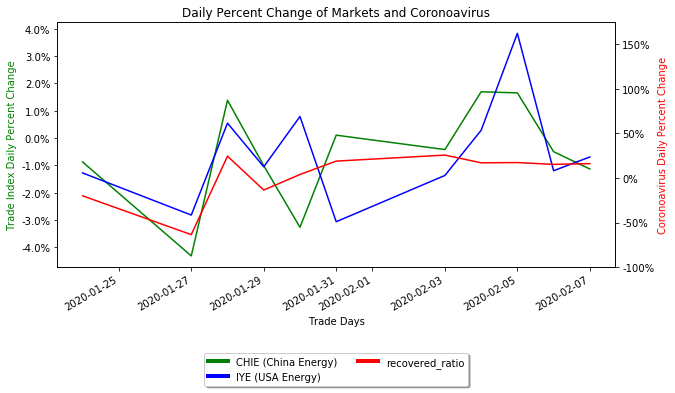

In [217]:
#created a double y axis chart to show percentage changes of market versus coronovirus
#looked for help on: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib/14762601
import matplotlib.ticker as mtick

x = df_all_data_pct_chg.index
y1 = df_all_data_pct_chg['CHIE (China Energy)']
y2 = df_all_data_pct_chg['IYE (USA Energy)']
y3 = df_all_data_pct_chg['recovered_ratio']

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', y2, 'b-')
ax2.plot(x, y3, 'r-')
                   
ax1.set_title('Daily Percent Change of Markets and Coronoavirus')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Trade Index Daily Percent Change', color='g')
ax2.set_ylabel('Coronoavirus Daily Percent Change', color='r')

ax2.set_ylim(-100, 175)

fig.autofmt_xdate()

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['CHIE (China Energy)', 'IYE (USA Energy)', 'recovered_ratio'], loc='upper center', bbox_to_anchor=(0.5, -.33),shadow=True, ncol=2)

plt.show()